In [1]:
# Checking the environment
import sys
import cv2
import numpy as np

print("Python version : {0} ".format(sys.version))
print("OpenCV version : {0} ".format(cv2.__version__))
print("Numpy version  : {0}".format(np.__version__))


Python version : 3.6.1 (default, Apr  4 2017, 09:40:21) 
[GCC 4.2.1 Compatible Apple LLVM 8.1.0 (clang-802.0.38)] 
OpenCV version : 3.2.0-dev 
Numpy version  : 1.12.1


<IPython.core.display.Javascript object>


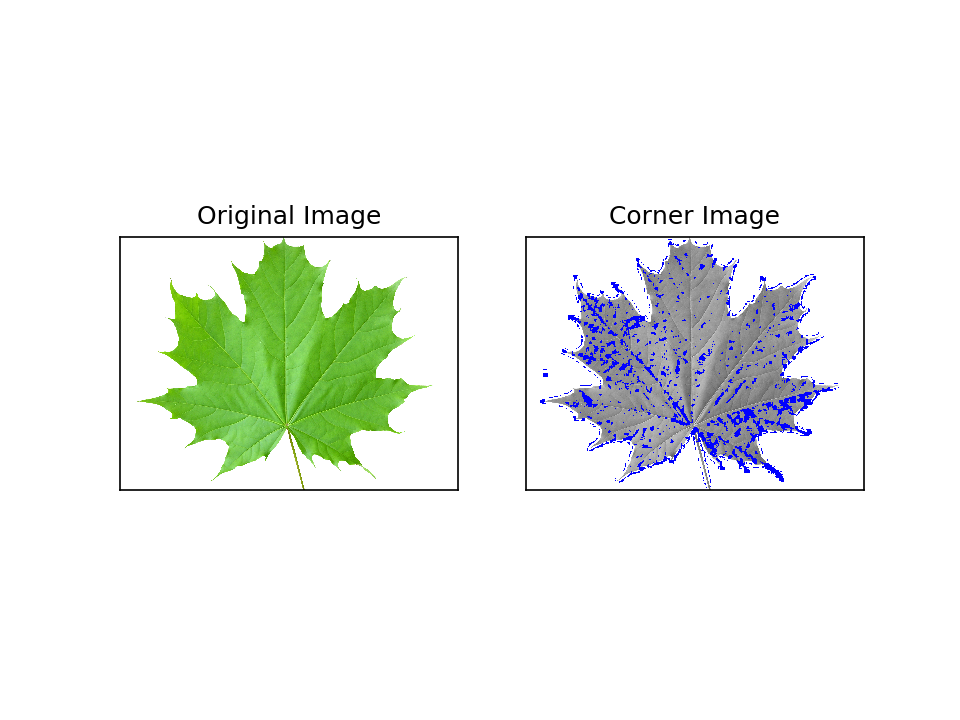

In [10]:
# Implementing Harris Corner Detection from Scratch

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

def findCorners(img, window_size=5, k=0.04, thresh=10000):
    """
    Finds and returns list of corners and new image with corners drawn
    :param img: The original image
    :param window_size: The size (side length) of the sliding window
    :param k: Harris corner constant. Usually 0.04 - 0.06
    :param thresh: The threshold above which a corner is counted
    :return:
    """
    
    #Find x and y derivatives
    dy,dx = np.gradiant(img)
    
    Ixx = dx ** 2
    Iyy = dy ** 2
    Ixy = dx * dy
    
    height = img.shape[0]
    width = img.shape[1]
    
    newImg = img.copy()
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
    offset = int(window_size/2)

    #Loop through image and find our corners
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            
            windowIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            
            #Calculate sum of squares
            Sxx = windowIxx.sum()
            Syy = windowIyy.sum()
            Sxy = windowixy.sum()

            #Find determinant and trace, use to get corner response
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            R = det - k*(trace**2)
            

            #If corner response is over threshold, color the point
            if R > thresh:
                color_img.itemset((y, x, 0), 0)
                color_img.itemset((y, x, 1), 0)
                color_img.itemset((y, x, 2), 255)
    return color_img

IMG = os.path.join("resources","images","newleaf.jpg")

img = mpimg.imread(IMG)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

res = findCorners(gray, 20, 0.2, 10000)

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(res)

plt.show()



<IPython.core.display.Javascript object>


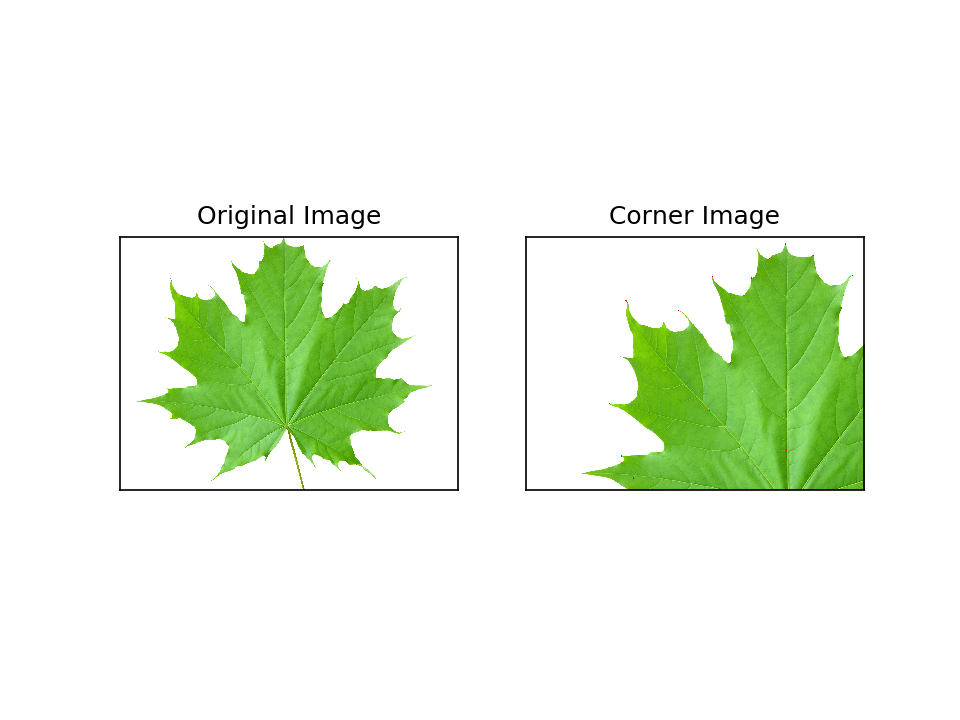

In [21]:
# Corner Detection using Harris-Shi-Tomasi Feature Detector 

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","newleaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


# Use goodFeaturesToTrack to detect cotners
corners = cv2.goodFeaturesToTrack(gray, 25, 0.01, 10)

# Round corner values to integers
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(copy,(x,y),3,255,-1)

plt.figure("Harri-Shi-Tomasi Feature Detector")



plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()



<IPython.core.display.Javascript object>


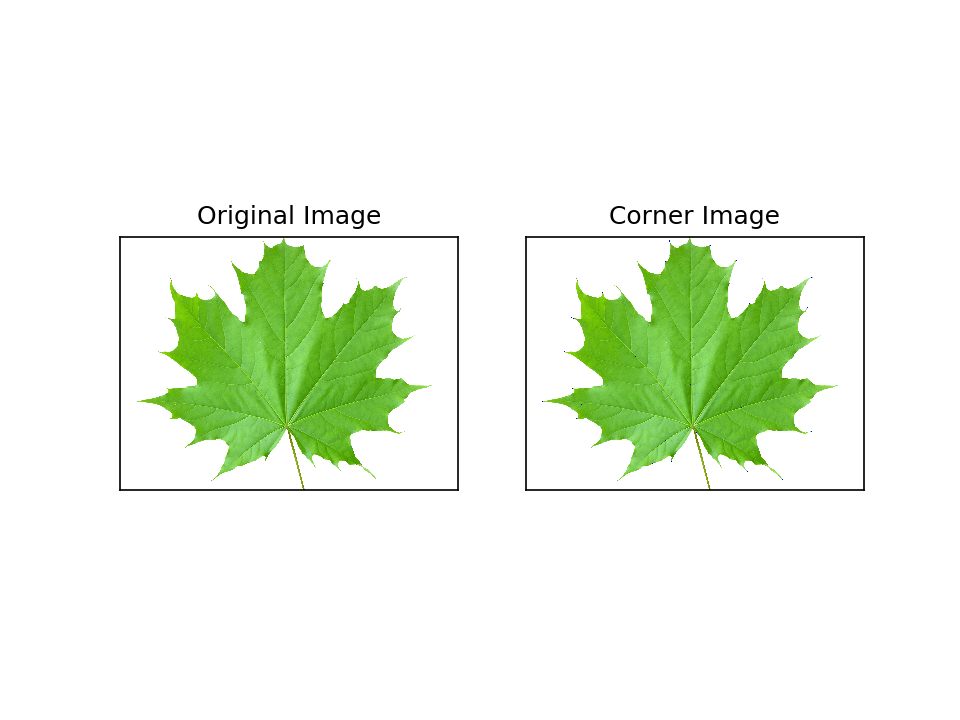

In [22]:
# Harris Corner Detection using OpenCV
# using cv2.cornerHarris()  

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","newleaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

# Call corner Harris
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
copy[dst>0.01*dst.max()]=[0,0,255]

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()



<IPython.core.display.Javascript object>


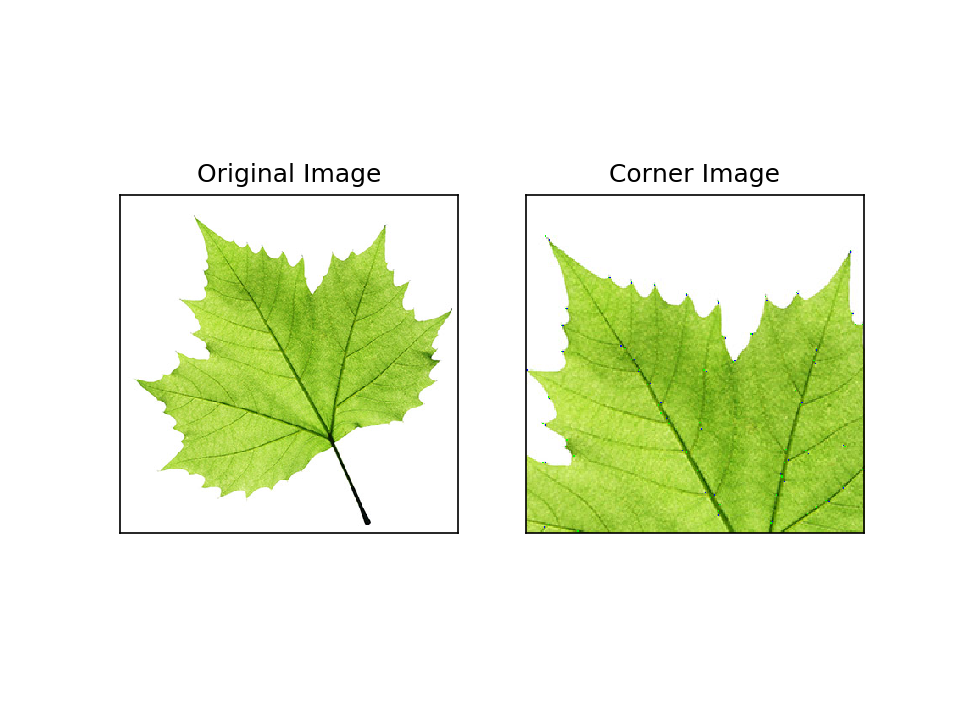

In [23]:
# Harris Corner Detection using OpenCV with Sub-Pixel Accuracy
# using cv2.cornerSubPix()  & cv2.connectedComponentsWithStats

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


gray = np.float32(gray)

# find Harris corners
dst = cv2.cornerHarris(gray,2,3,0.04)

dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

# Find the corner subpixels using the function cornerSubPix
corners = cv2.cornerSubPix(gray, np.float32(centroids), (5,5), (-1,-1), criteria )
# Now draw them
# the blue points are really small use cv2.circle to make them visible
res = np.hstack((centroids,corners))
res = np.int0(res)
copy[res[:,1],res[:,0]]=[0,0,255]
copy[res[:,3],res[:,2]] = [0,255,0]



plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

Time taken for detecting keypoints using SIFT  1.2931993007659912  seconds


<IPython.core.display.Javascript object>


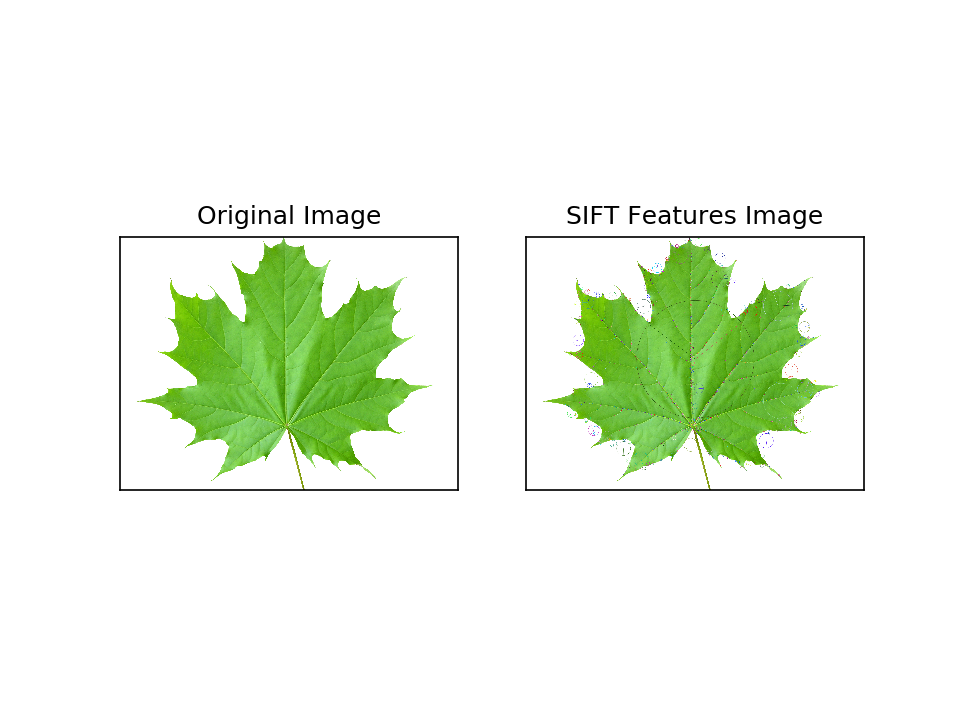

In [11]:
# SIFT - Scale Invariant Feature Transform Example

import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","newleaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# starting a timer
start = time.time()

# Call the detect function of SIFT object to get keypoints
kp = sift.detect(copy, None)

# elapsed
elapsed = time.time() - start

print("Time taken for detecting keypoints using SIFT ", elapsed, " seconds")

# draw the keypoint descriptors
cv2.drawKeypoints(copy,kp,copy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("SIFT Features")

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("SIFT Features Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

Time taken for detecting keypoints using SURF 0.22586703300476074  seconds


<IPython.core.display.Javascript object>


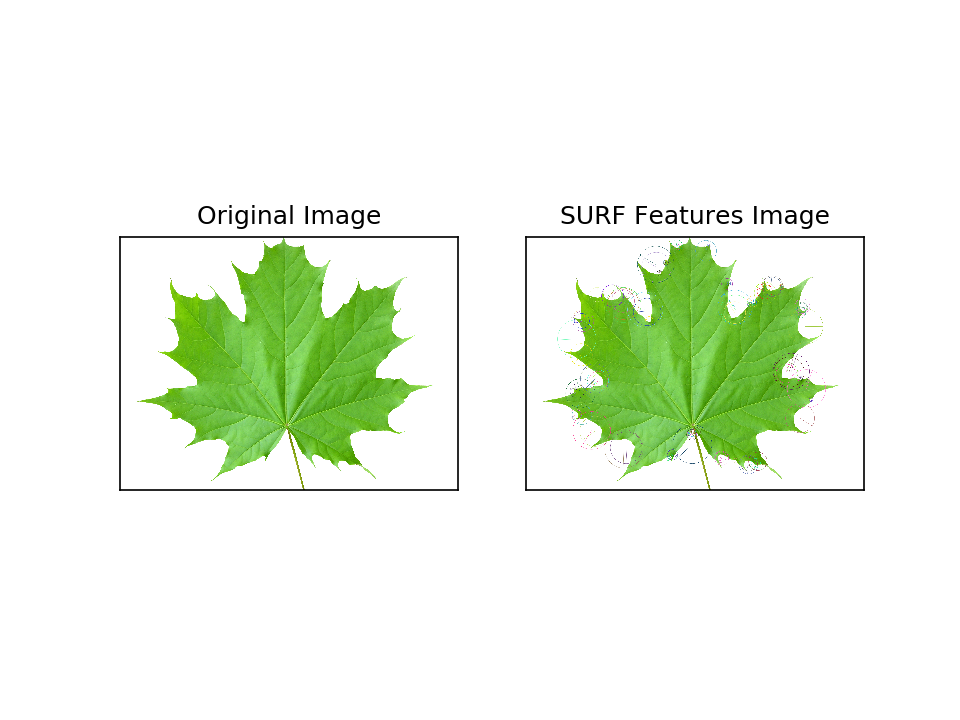

In [12]:
# SURF - Speed-Up Robust Features

import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","newleaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

THRESHOLD = 5000

# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 5000

# Create a SURF object
surf = cv2.xfeatures2d.SURF_create(THRESHOLD)
# starting a timer
start = time.time()

# call detectAndCompute function
kp, des = surf.detectAndCompute(img, None)

# elapsed
elapsed = time.time() - start

print("Time taken for detecting keypoints using SURF", elapsed, " seconds")

cv2.drawKeypoints(copy,kp,copy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("SURF Features")

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("SURF Features Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

<IPython.core.display.Javascript object>


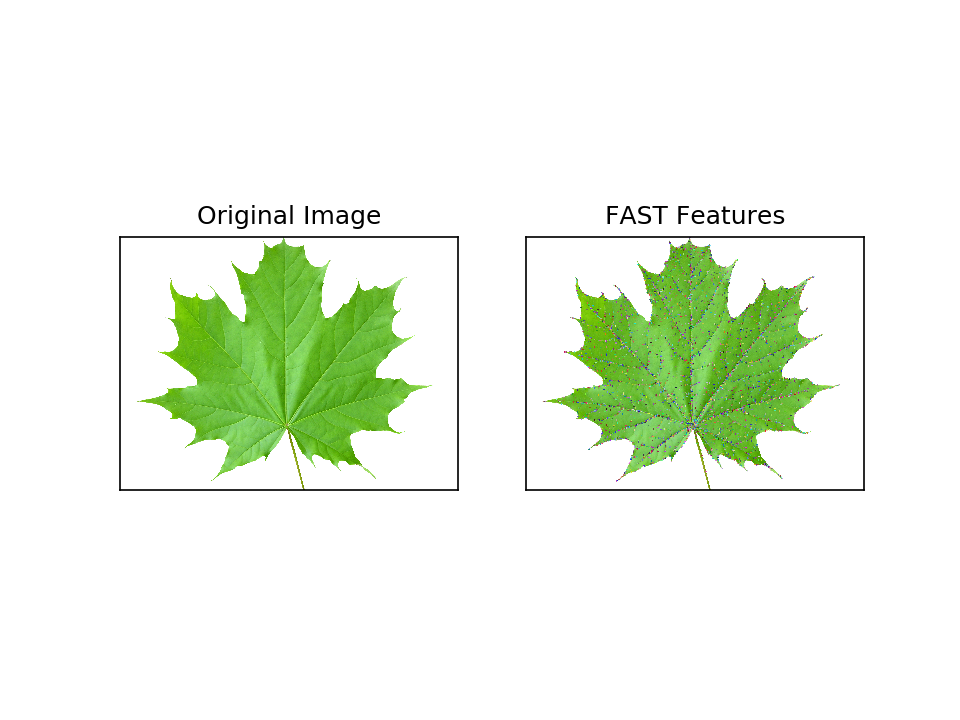

In [13]:
# FAST - Features from Accelerated Segment Test

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","newleaf.jpg")
img = mpimg.imread(IMG)

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img, None)

copy = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("FAST Features")

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("FAST Features")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

Descriptor Size :  32
Descriptor Shape :  (103, 32)


<IPython.core.display.Javascript object>


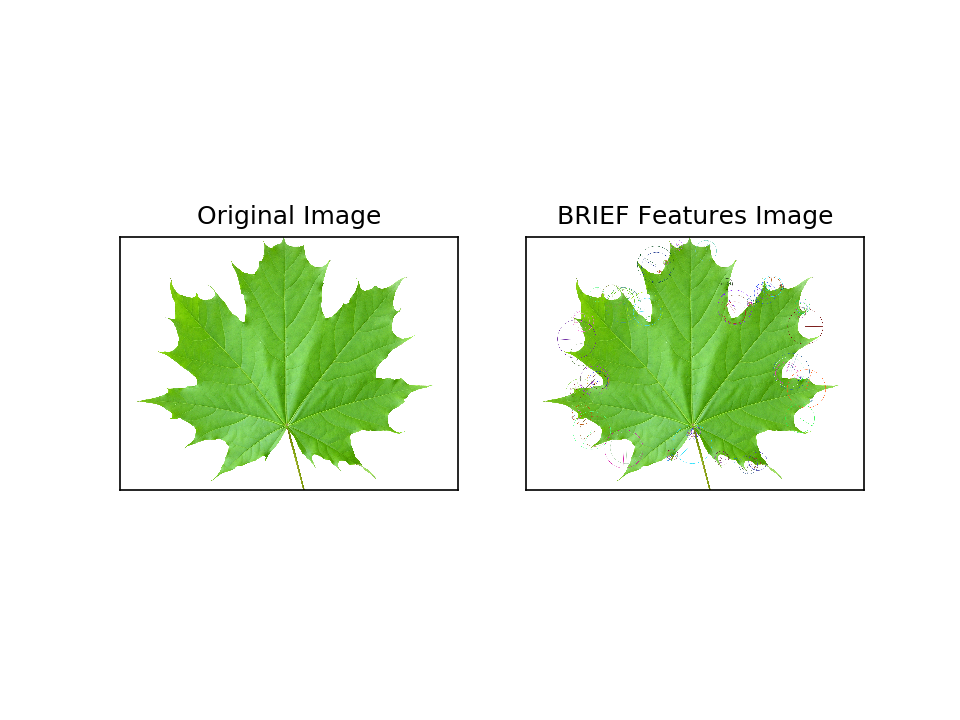

In [14]:
# BRIEF - Binary Robust Independent Elementary Features

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","newleaf.jpg")
img = mpimg.imread(IMG)

THRESHOLD = 5000

# Making a copy of the original image
copy = img.copy()

# Using SURF detector
surf = cv2.xfeatures2d.SURF_create(THRESHOLD)

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with SURF
kp = surf.detect(img, None)

# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)

print("Descriptor Size : ", brief.descriptorSize())
print("Descriptor Shape : ", des.shape)

cv2.drawKeypoints(copy,kp,copy,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("BRIEF Features using SURF Detector")

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("BRIEF Features Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

<IPython.core.display.Javascript object>


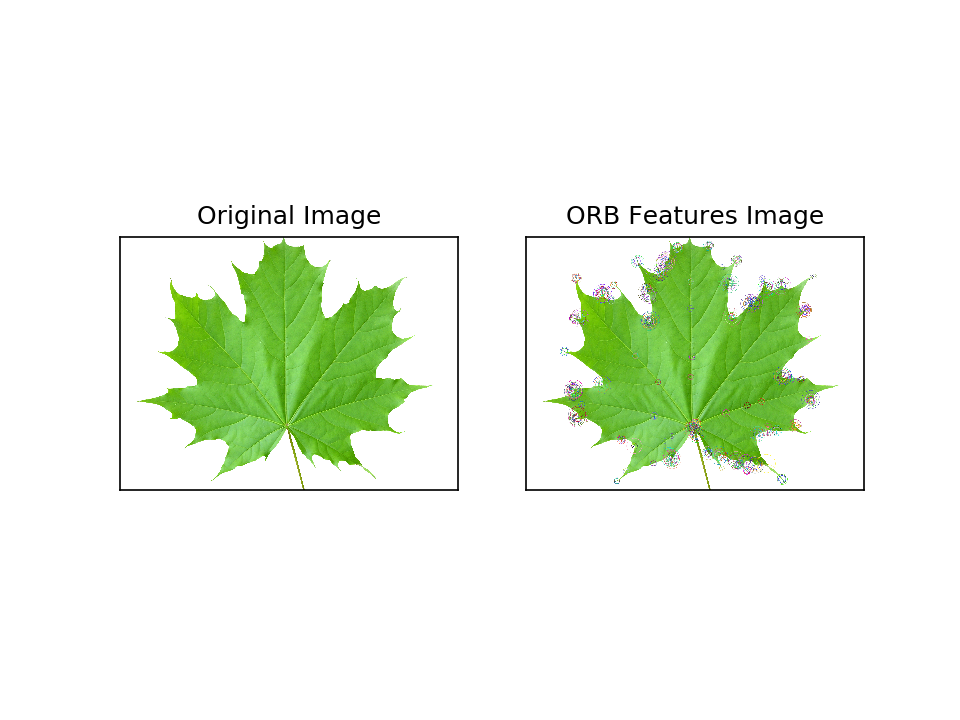

In [15]:
# ORB - Oriented FAST and Rotated BRIEF

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","newleaf.jpg")
img = mpimg.imread(IMG)

# Making a copy of the original image
copy = img.copy()

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img, None)

# compute the descriptors with ORB
kp, des = orb.compute(img , kp)

# draw only keypoints location,not size and orientation
cv2.drawKeypoints(img, kp, copy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("ORB Features")

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("ORB Features Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

<IPython.core.display.Javascript object>


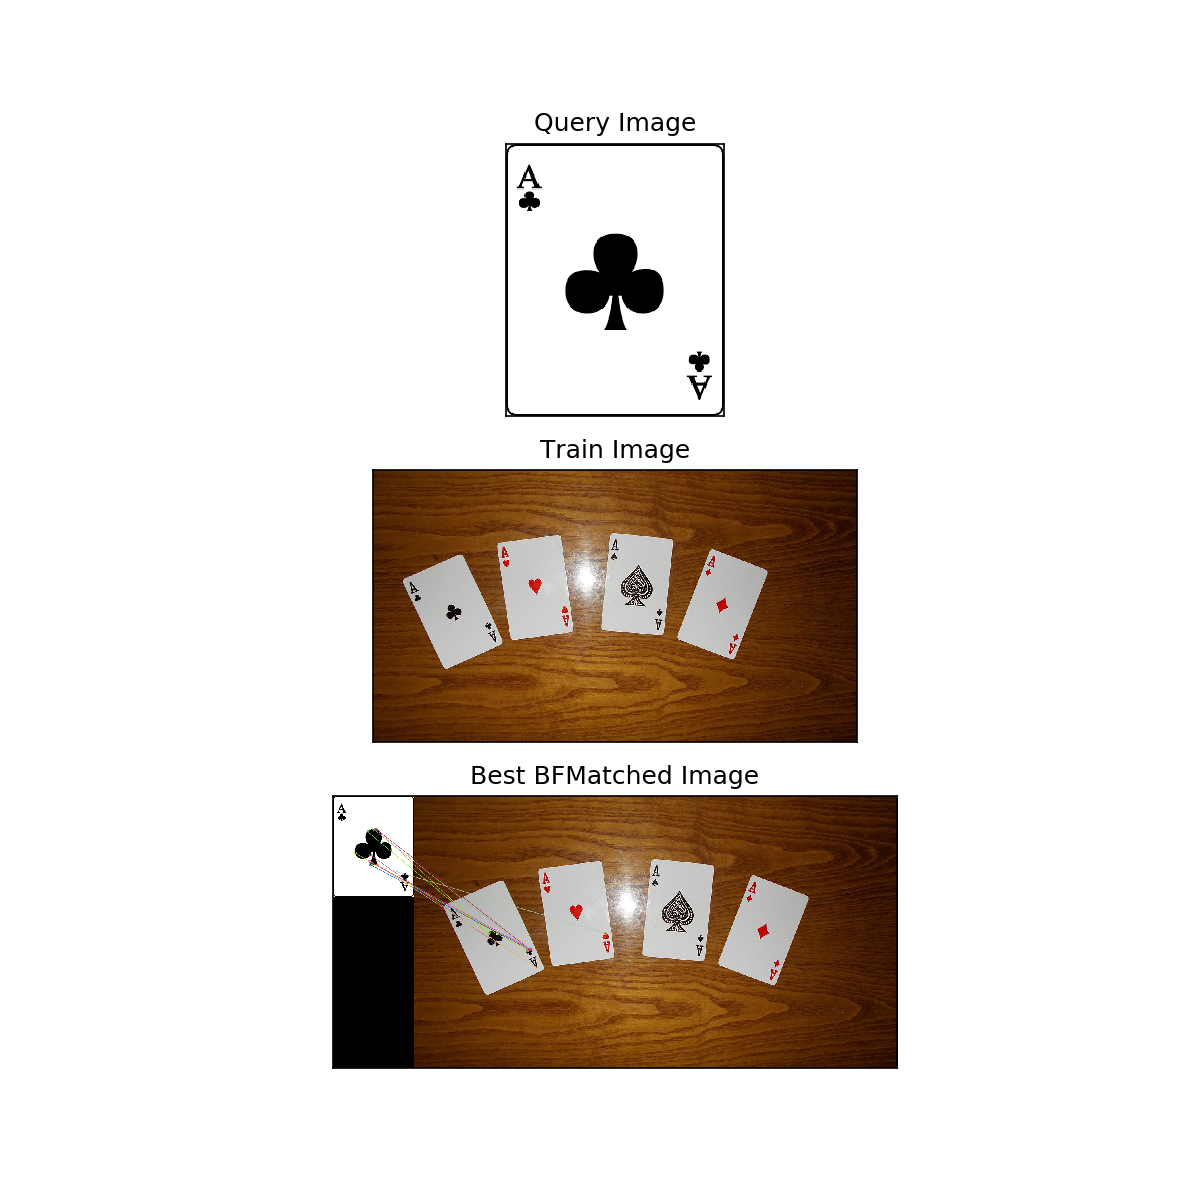

In [24]:
# Brute-Force Matcher - Best Match Example

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

# query image
IMG   = os.path.join("resources","images","card.png")
img1  = cv2.imread(IMG)
img1  = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
copy1 = img1.copy()
copy1 = cv2.cvtColor(copy1, cv2.COLOR_BGR2GRAY)

# train image
IMG2  = os.path.join("resources","images","card_in_scene.jpg")
img2  = mpimg.imread(IMG2)
copy2  = img2.copy()
copy2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2GRAY)


# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(copy1, None)
kp2, des2 = orb.detectAndCompute(copy2, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1, des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)

plt.figure("BFMatcher - Best Match",figsize=(8,8))

plt.subplot(311)
plt.title("Query Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img1)

plt.subplot(312)
plt.title("Train Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

plt.subplot(313)
plt.title("Best BFMatched Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)

plt.show()


<IPython.core.display.Javascript object>


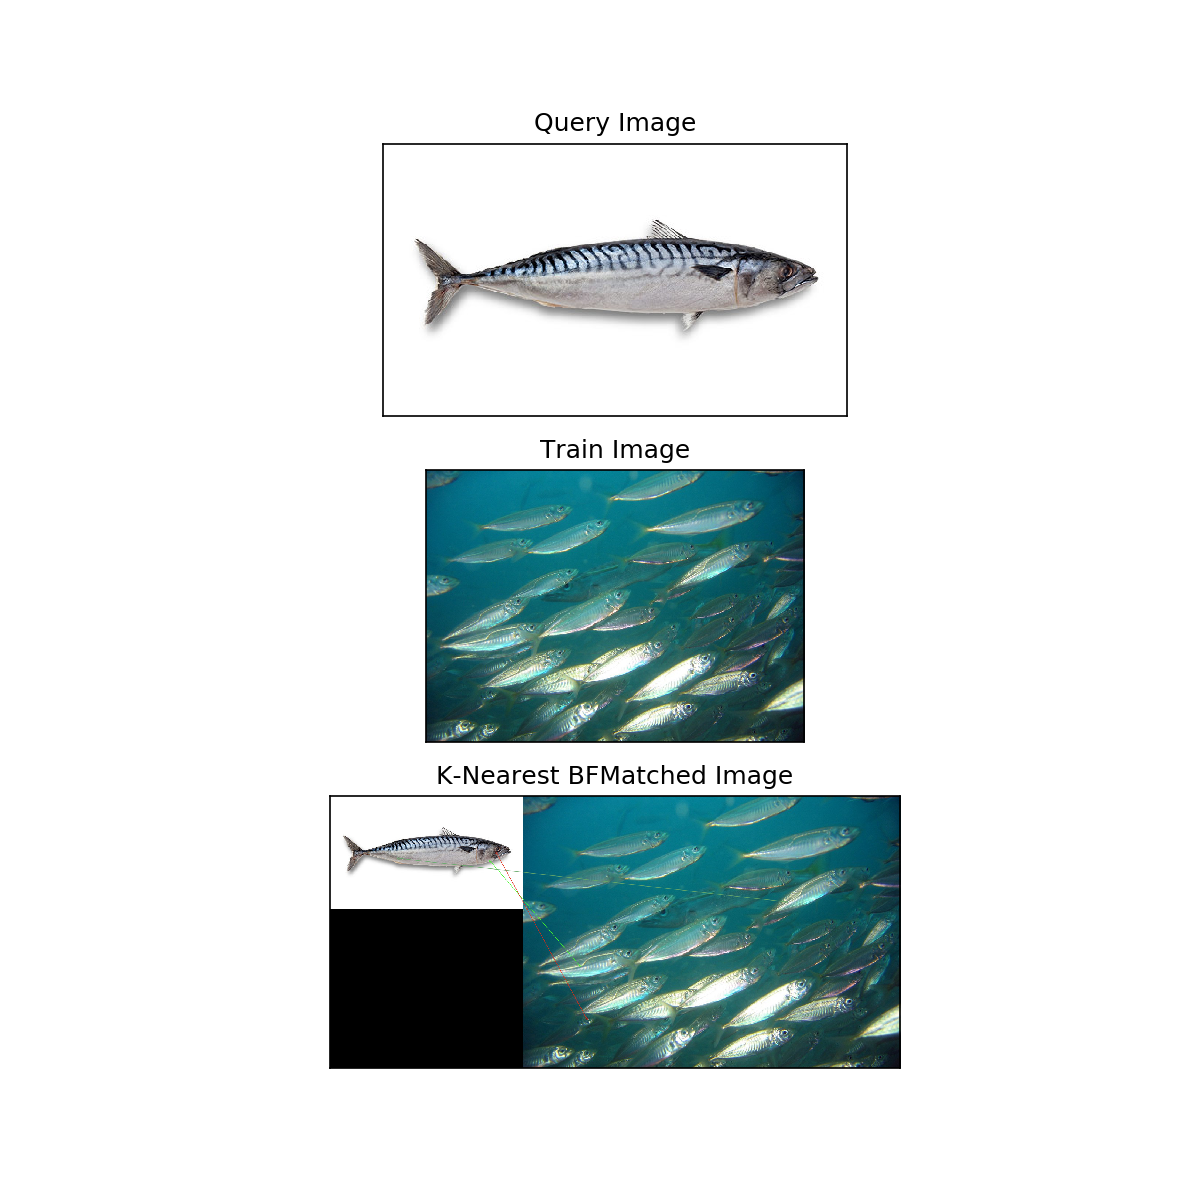

In [28]:
# Brute-Force Matcher - K-Nearest Match Example

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

# query image
IMG   = os.path.join("resources","images","fish.jpg")
img1  = mpimg.imread(IMG)
copy1 = img1.copy()
copy1 = cv2.cvtColor(copy1, cv2.COLOR_BGR2GRAY)

# train image
IMG2  = os.path.join("resources","images","fish_in_scene.jpg")
img2  = mpimg.imread(IMG2)
copy2  = img2.copy()
copy2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()


# Use KNNMatcher to match the  query and target image feature descriptors 
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.figure("BFMatcher - K-Nearest Match",figsize=(8,8))

plt.subplot(311)
plt.title("Query Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img1)

plt.subplot(312)
plt.title("Train Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

plt.subplot(313)
plt.title("K-Nearest BFMatched Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)

plt.show()


<IPython.core.display.Javascript object>


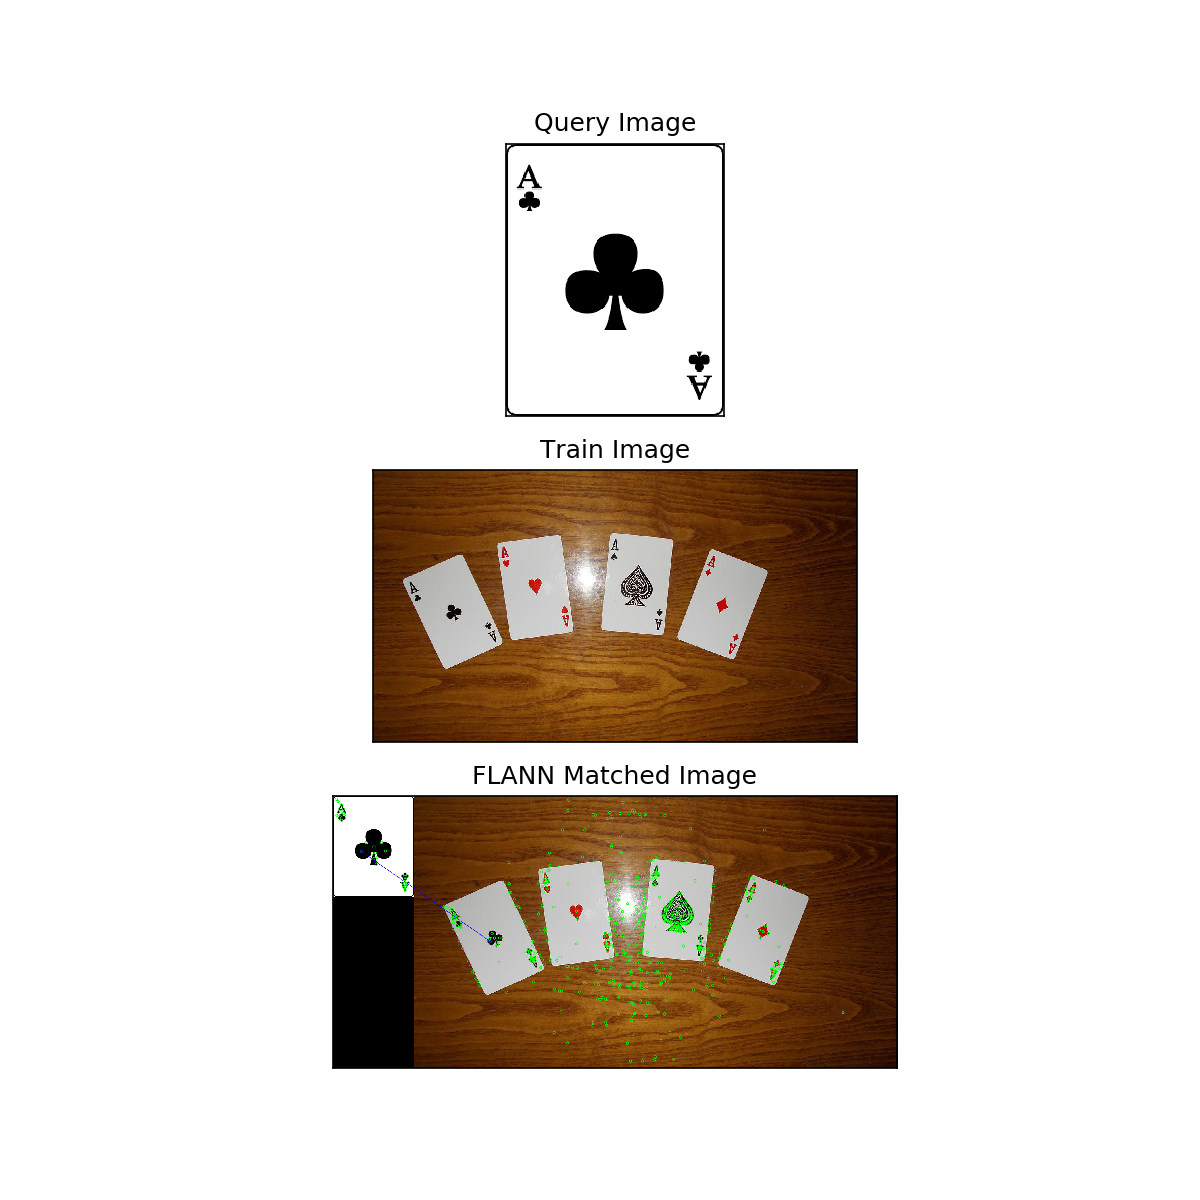

In [29]:
# FLANN Based Matcher

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

# query image
IMG   = os.path.join("resources","images","card.png")
img1  = cv2.imread(IMG)
img1  = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
copy1 = img1.copy()
copy1 = cv2.cvtColor(copy1, cv2.COLOR_BGR2GRAY)

# train image
IMG2  = os.path.join("resources","images","card_in_scene.jpg")
img2  = mpimg.imread(IMG2)
copy2  = img2.copy()
copy2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

# Creating an instance of the FLANN based matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)


# Using the knnMatch function of the flann based matcher to match query and target feature descriptors
matches = flann.knnMatch(des1, des2, k = 2)


# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        
draw_params = dict(matchColor = (0,0,255),
                   singlePointColor = (0,255,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.figure("FLANN-Based Match",figsize=(8,8))

plt.subplot(311)
plt.title("Query Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img1)

plt.subplot(312)
plt.title("Train Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

plt.subplot(313)
plt.title("FLANN Matched Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)

plt.show()

<IPython.core.display.Javascript object>


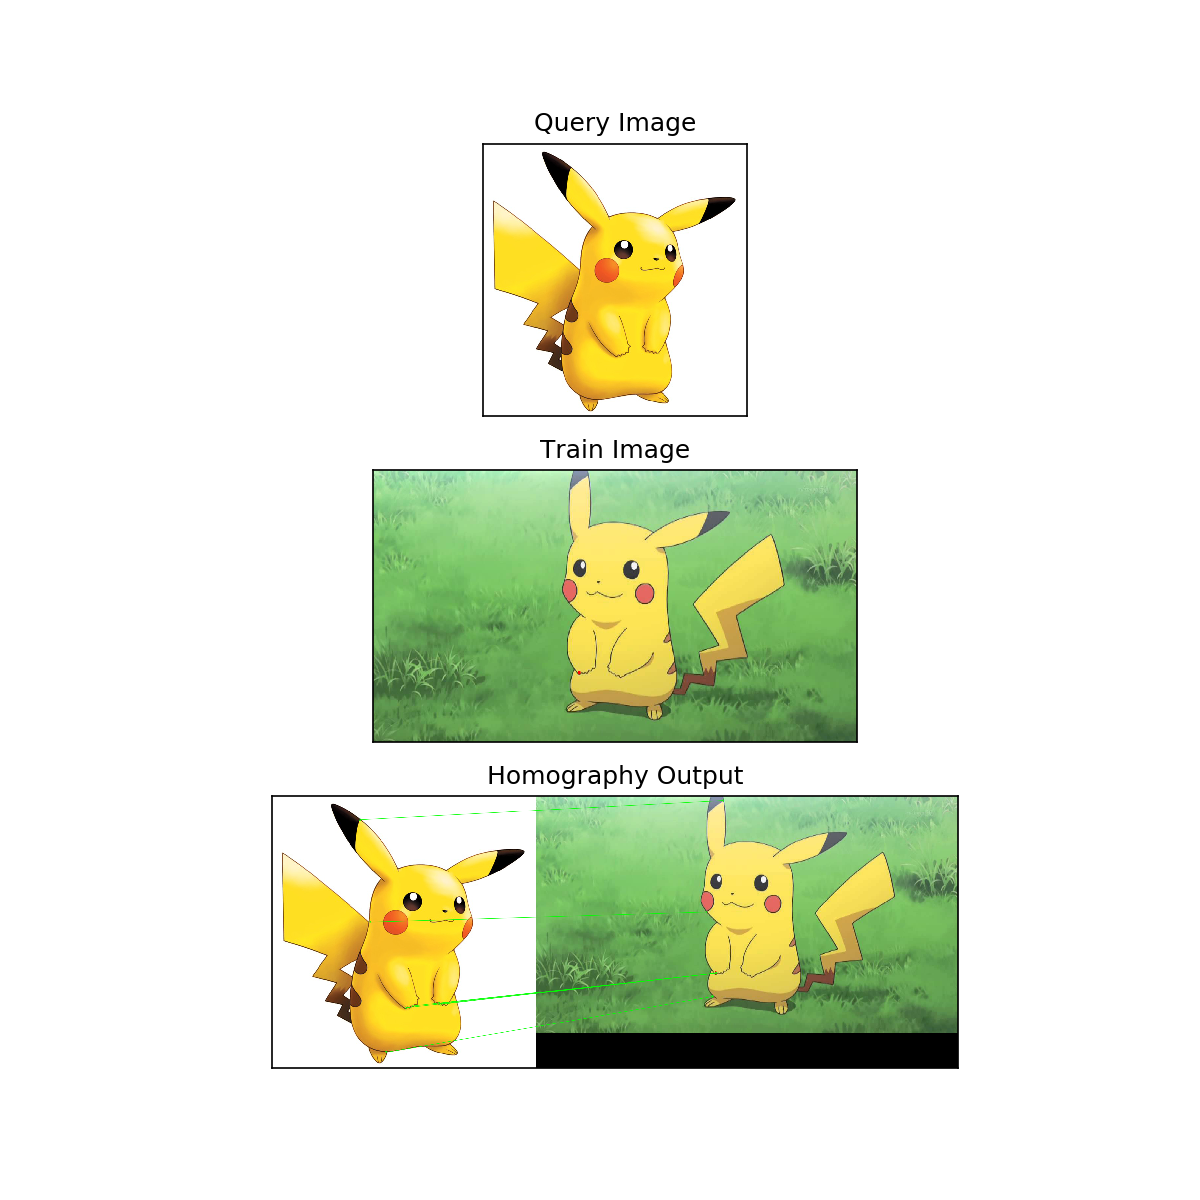

In [30]:
# Homography - To transfrom between two frames containing the same object

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

MIN_MATCH_COUNT = 10

# query image
IMG   = os.path.join("resources","images","pikachu.png")
img1  = cv2.imread(IMG)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
copy1 = img1.copy()
copy1 = cv2.cvtColor(copy1, cv2.COLOR_BGR2GRAY)

# train image
IMG2  = os.path.join("resources","images","pikachu_in_scene.jpg")
img2  = mpimg.imread(IMG2)
copy2 = img2.copy()
copy2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2GRAY)


# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0

index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    
    
    # Use the findHomography function to get the perpective transform between two images
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
    
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    
    dst = cv2.perspectiveTransform(pts, M)
    
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print("Not enough matches are found - {0}/{1}".format(len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.figure("Homography Example",figsize=(8,8))

plt.subplot(311)
plt.title("Query Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img1)

plt.subplot(312)
plt.title("Train Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

plt.subplot(313)
plt.title("Homography Output")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)

plt.show()

In [ ]:
# Mean-Shift Based Tracking from Scratch - Api

In [51]:
# Mean-Shift Based Tracking from Scratch - Driver

import numpy as np
import cv2

def run_main():
    cap = cv2.VideoCapture('videoShift.mp4')

    # Read the first frame of the video
    ret, frame = cap.read()

    # Set the ROI (Region of Interest). Actually, this is a
    # rectangle of the building that we're tracking
    c,r,w,h = 900,650,70,70
    track_window = (c,r,w,h)

    # Create mask and normalized histogram
    roi = frame[r:r+h, c:c+w]
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_roi, np.array((0., 30.,32.)), np.array((180.,255.,255.)))
    roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
    cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)
    term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 80, 1)
    
    while True:
        ret, frame = cap.read()

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)

        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        x,y,w,h = track_window
        cv2.rectangle(frame, (x,y), (x+w,y+h), 255, 2)
        cv2.putText(frame, 'Tracked', (x-25,y-10), cv2.FONT_HERSHEY_SIMPLEX,
            1, (255,255,255), 2, cv2.CV_AA)
        
        cv2.imshow('Tracking', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    run_main()

TypeError: 'NoneType' object is not subscriptable

In [50]:
# Installing ffmpeg for playing video's in notebook
import imageio

imageio.plugins.ffmpeg.download()

In [ ]:
# Video Analysis Examples run 
import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML

VIDEO_SRC=os.path.join("..","resources","images")
i_video  = os.path.join(VIDEO_SRC,"videoShift.mp4")
o_video = os.path.join(VIDEO_SRC,"videoShift_out.mp4")

input_video = VideoFileClip(i_video).subclip(0,10)
input_clip = input_video.fl_image(process_image)
%time input_clip.write_videofile(o_video, audio=False)


HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(input_video))

In [ ]:
# Cam-Shift Tracking

import numpy as np
import cv2

cap = cv2.VideoCapture('slow.flv')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
r,h,c,w = 250,90,400,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )
while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # apply meanshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        
        # Draw it on image
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        cv2.imshow('img2',img2)
        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
        
cv2.destroyAllWindows()
cap.release()

In [ ]:
# Optical Flow for Video Stabilization




In [32]:
# MNIST CNN - Loading Data

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


(36, 36)
8


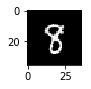

In [107]:
# MNIST Dataset Random Visualization

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

print(image.shape)
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [ ]:
# MNIST CNN  -  Architecture



In [84]:
# MNIST CNN  -  Building Model

import sys
import time
import tensorflow as tf

EPOCHS = 10
DROPOUT = 0.5
BATCH_SIZE = 100
SCALE = 0.1 # Scaling to 
LEARNING_RATE = 1e-4
FLAGS=None

def deepnn(x):
    
    # Reshape to use within a convolutional neural net.
    # Last dimension is for "features" - there is only one here, since images are
    # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # First convolutional layer - maps one grayscale image to 32 feature maps.
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

    # Pooling layer - downsamples by 2X.
    h_pool1 = max_pool_2x2(h_conv1)

    # Second convolutional layer -- maps 32 feature maps to 64.
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

    # Second pooling layer.
    h_pool2 = max_pool_2x2(h_conv2)

    # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
    # is down to 7x7x64 feature maps -- maps this to 1024 features.
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    # Dropout - controls the complexity of the model, prevents co-adaptation of
    # features.
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    # Map the 1024 features to 10 classes, one for each digit
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    return y_conv, keep_prob


def conv2d(x, W):
    """conv2d returns a 2d convolution layer with full stride."""
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
    """max_pool_2x2 downsamples a feature map by 2X."""
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


def weight_variable(shape):
    """weight_variable generates a weight variable of a given shape."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    """bias_variable generates a bias variable of a given shape."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
 
mnist = input_data.read_data_sets("MNIST_data/",  one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

# Build the graph for the deep net
y_conv, keep_prob = deepnn(x)

cross_entropy = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Training....")
    for epoch in range(EPOCHS):
        # number of batches in one epoch
        batch_count = int(mnist.train.num_examples/BATCH_SIZE)
        for i in range(int(batch_count * SCALE)):
            batch = mnist.train.next_batch(BATCH_SIZE)
            train_accuracy = accuracy.eval(feed_dict={ x: batch[0], y_: batch[1], keep_prob: 1.0})
            train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: DROPOUT})
        print('Epoch %d, training accuracy %g' % (epoch, train_accuracy))
            
    # Testing 
    print('Test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

    # Saving the Model
    save_path = saver.save(sess, "Models/mnist_dnn.ckpt")
    print ("Model saved in file: ", save_path)

    

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Training....
Epoch 0, training accuracy 0.75
Epoch 1, training accuracy 0.94
Epoch 2, training accuracy 0.92
Epoch 3, training accuracy 0.89
Epoch 4, training accuracy 0.97
Epoch 5, training accuracy 0.93
Epoch 6, training accuracy 0.95
Epoch 7, training accuracy 1
Epoch 8, training accuracy 0.94
Epoch 9, training accuracy 0.96
Test accuracy 0.9617
Model saved in file:  Models/mnist_dnn.ckpt


In [101]:
batch = mnist.train.next_batch(1)
print(batch[0].shape)
print(batch[1].shape)

(1, 784)
(1, 10)


In [43]:
# MNIST CNN  -  Predictor 

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Randomly picking a number
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "Models/mnist_dnn.ckpt")
    print ("Model restored.")
    x = tf.placeholder(tf.float32, [None, 784])
    y_conv, keep_prob = deepnn(x)
    prediction=tf.argmax(y_conv,1)
    res = prediction.eval(feed_dict={x: batch[0],keep_prob: 1.0}, session=sess)
    print(res)
  
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])






INFO:tensorflow:Restoring parameters from Models/mnist_dnn.ckpt


NotFoundError: Key Variable_1/Adam not found in checkpoint
	 [[Node: save_5/RestoreV2_4 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_5/Const_0, save_5/RestoreV2_4/tensor_names, save_5/RestoreV2_4/shape_and_slices)]]

Caused by op 'save_5/RestoreV2_4', defined at:
  File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-f369689cde4c>", line 34, in <module>
    saver = tf.train.Saver()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1056, in __init__
    self.build()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1086, in build
    restore_sequentially=self._restore_sequentially)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 691, in build
    restore_sequentially, reshape)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 669, in restore_v2
    dtypes=dtypes, name=name)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key Variable_1/Adam not found in checkpoint
	 [[Node: save_5/RestoreV2_4 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_5/Const_0, save_5/RestoreV2_4/tensor_names, save_5/RestoreV2_4/shape_and_slices)]]


In [45]:
# Predictor
import tensorflow as tf

sess = tf.InteractiveSession()

init_op = tf.global_variables_initializer()

saver = tf.train.Saver()

sess.run(init_op)

saver.restore(sess, "Models/mnist_dnn.ckpt")


def predictint(imvalue):
    """
    This function returns the predicted integer.
    The input is the pixel values from the imageprepare() function.
    """            
    prediction=tf.argmax(y,1)
    return prediction.eval(feed_dict={x: [imvalue]}, session=sess)

# Test images generation

# Randomly picking a number
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

    
label = predictint(imvalue)
    
print(get_char(label[0]))
plt.imshow(image)
plt.show()


INFO:tensorflow:Restoring parameters from Models/mnist_dnn.ckpt


NotFoundError: Key Variable/Adam_1 not found in checkpoint
	 [[Node: save_6/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_6/Const_0, save_6/RestoreV2_2/tensor_names, save_6/RestoreV2_2/shape_and_slices)]]

Caused by op 'save_6/RestoreV2_2', defined at:
  File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-a250c2cb4432>", line 8, in <module>
    saver = tf.train.Saver()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1056, in __init__
    self.build()
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1086, in build
    restore_sequentially=self._restore_sequentially)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 691, in build
    restore_sequentially, reshape)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 669, in restore_v2
    dtypes=dtypes, name=name)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/rmunshi/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key Variable/Adam_1 not found in checkpoint
	 [[Node: save_6/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_6/Const_0, save_6/RestoreV2_2/tensor_names, save_6/RestoreV2_2/shape_and_slices)]]


In [33]:
# LeNet - CNN

import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

EPOCHS = 10
BATCH_SIZE = 128

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


# Pad images with 0s, since LENET requires 32*32 image
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

X_train, y_train = shuffle(X_train, y_train)


# Creating Placeholder and one-hot encoding the label data
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)


learning_rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Updated Image Shape: (32, 32, 1)
Training...
EPOCH 1 ...
Validation Accuracy = 0.967

EPOCH 2 ...
Validation Accuracy = 0.980

EPOCH 3 ...
Validation Accuracy = 0.985

EPOCH 4 ...
Validation Accuracy = 0.984

EPOCH 5 ...
Validation Accuracy = 0.986

EPOCH 6 ...
Validation Accuracy = 0.988

EPOCH 7 ...
Validation Accuracy = 0.984

EPOCH 8 ...
Validation Accuracy = 0.989

EPOCH 9 ...
Validation Accuracy = 0.986

EPOCH 10 ...
Validation Accuracy = 0.989

Model saved


In [34]:
# LeNet - CNN - Evaluation
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.990


In [ ]:
# Inception/ GoogleNet - CNN



In [41]:
! ls Models/mnist_dnn*

Models/mnist_dnn.ckpt.data-00000-of-00001
Models/mnist_dnn.ckpt.index
Models/mnist_dnn.ckpt.meta
